> # $$Predicting sudden fatal diseases$$

**Author**
Fayyad Bayan
#### Executive Summary
Graduation Project 20.1: Initial Report and Exploratory Data Analysis (EDA)

#### Reasons
Why should people care about this question?
The project aims to understand the relationship between different health factors such as diabetes and stroke based on the analysis of health data. This understanding can help improve disease diagnosis and provide more accurate and effective treatments, which contributes to improving the overall health of individuals.

#### Research Question
What question are you trying to answer?
I am trying to answer how different health factors affect the likelihood of diabetes and stroke using graphical analysis and data modeling techniques.

#### Data Sources
What data will you use to answer your question?
I used a health dataset that includes information on diabetes, stroke, blood pressure, age, and body mass index, which was obtained from the Kaggle data source.
https://www.kaggle.com/datasets/prosperchuks/health-dataset/data
#### Methodology
What methods do you use to answer the question?
I used Exploratory Data Analysis (EDA) to understand patterns and trends in the data. I create predictive models using machine learning algorithms such as Random Forest and SVC, and improve the performance of the models using optimization techniques such as Grid Search and Random Search.

#### Results
What did you find from your research?
The research results found that the Random Forest model performs well compared to other models. For diabetes, we got an accuracy of 74.49%, while the results for stroke were unsatisfactory with an accuracy of 93.85% but with low F1 Score and Recall. Improving models using Random Search and Grid Search showed that some algorithms can improve performance, but the results vary depending on the model.

#### Next Steps
What are the suggestions for next steps?
The focus should be on improving the performance of stroke models that had unsatisfactory results. The influencing factors can also be studied more deeply and additional machine learning algorithms or new data processing techniques can be tested to obtain more accurate results.

#### Project outline

- [Link to notebook 1]()
- [Link to notebook 2]()
- [Link to notebook 3]()

##### Contact and more information
fayyadf@hotmail.com

____
> ### lip

In [223]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import time

from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report , mean_absolute_error


____
> **Data OverView**
* diabetes = [columns = 18 , rows = 70000 , notnull , The main data contains some outliers.]
* Stroke = [columns = 14 , rows = 26000 , ]
* blood = [columns = 11 , rows = 40000 , .]

____
> ### DataSet :

In [224]:

diabetes = pd.read_csv(r'Data\diabetes_data.csv')
stroke = pd.read_csv(r'Data\stroke_data.csv') 
blood = pd.read_csv(r'Data\hypertension_data.csv')

diabetes = diabetes.sample(70000)
blood = blood.sample(26000 , random_state=42)
stroke = stroke.sample(40000 , random_state=42)

print(f' Diabetes : {diabetes.shape} ,Blood : {blood.shape} , Stroke {stroke.shape}')

 Diabetes : (70000, 18) ,Blood : (26000, 14) , Stroke (40000, 11)


___
___
___
> # EDA

In [225]:
# diabetes.info()

### هذا الكود يقوم بالكشف عن القيم الشاذة (outliers) 

In [226]:
coun = 0
for feature in diabetes:
    Q1 = diabetes[feature].quantile(0.25)
    Q3 = diabetes[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if diabetes[(diabetes[feature]>upper)].any(axis=None):
            print(feature, "yes" )
    else:
        print(feature, "no")

Age no
Sex no
HighChol no
CholCheck no
BMI yes
Smoker no
HeartDiseaseorAttack yes
PhysActivity no
Fruits no
Veggies no
HvyAlcoholConsump yes
GenHlth no
MentHlth yes
PhysHlth yes
DiffWalk no
Stroke yes
HighBP no
Diabetes no


**عرض رسم بياني لمعرفة وجود اي قيم شاذة اخرى**

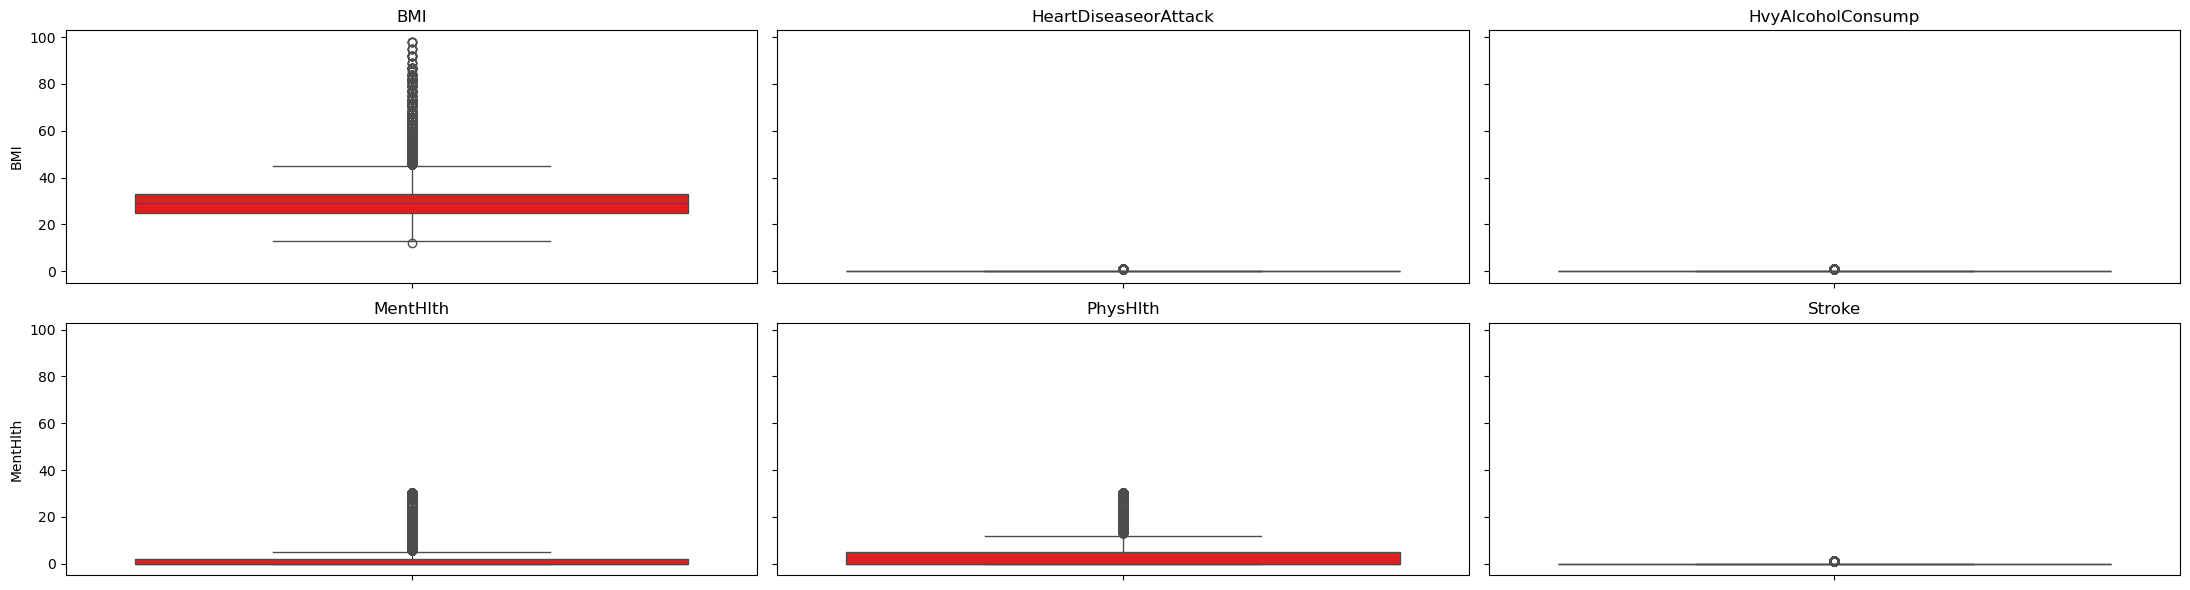

In [227]:


columns_to_plot = [
    'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 
    'MentHlth', 'PhysHlth', 'Stroke'
]

fig, axes = plt.subplots(2, 3, figsize=(22, 6), sharey=True)

for ax, column in zip(axes.flat, columns_to_plot):
    sns.boxplot(data=diabetes, y=column, ax=ax , color='red')
    ax.set_title(column)

plt.tight_layout()
plt.show()


___
> ### Delete null value

In [228]:
diabetes.isnull().sum() ## 0

blood.isnull().sum()
blood.dropna(inplace=True,axis=1)

stroke.isnull().sum()
stroke.dropna(inplace=True,axis=1)

In [229]:
diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
28472,10.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0
7146,4.0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
17400,10.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24188,1.0,0.0,0.0,1.0,39.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
21905,5.0,0.0,0.0,1.0,35.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,15.0,2.0,0.0,0.0,0.0,0.0


<Axes: >

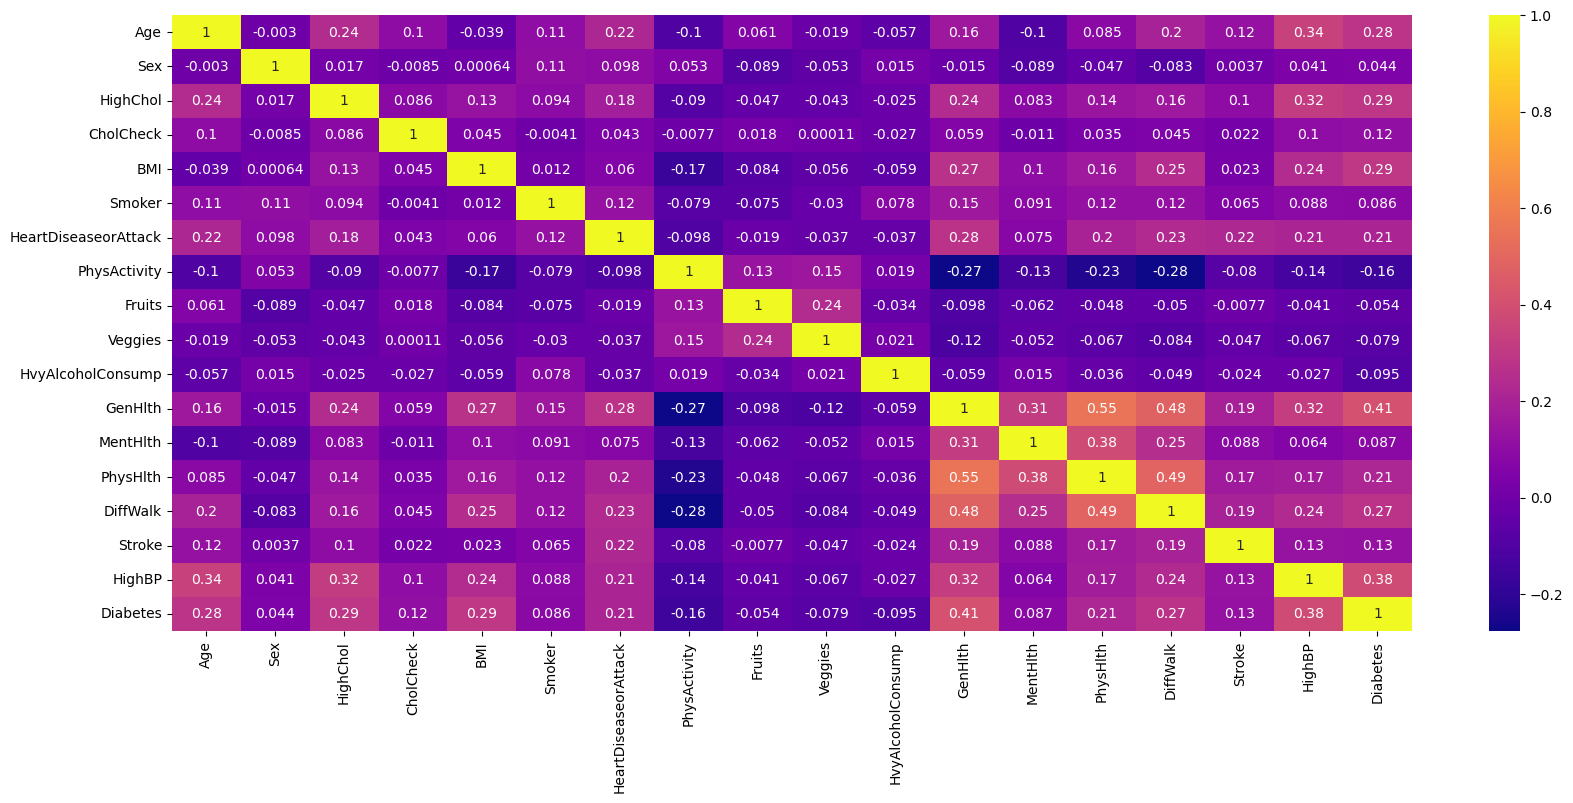

In [230]:
cor_df = diabetes.corr()

plt.figure(figsize=[20,8])

sns.heatmap(cor_df , cmap='plasma' , annot=True)


As we see, the dataset is clean, there's not null data or non-numerical data.

Some of the predictors are continuous variables and others are discrete variables. As the owner of the dataset has declared, the target classes are balanced.

The most healthy and young is the patient, the smaller is the probability of having diabetes; except for the alcohol consumption and cholesterol check, wich have a little inverse relationship.

Between the predictor variables, there's no significant correlation, except between the indicators of patient's good (or bad) health, which has sense. These are: general helth, mental health, physical health and difficulty walking.

The features that are the most correlated with the target are: GenHlth (0.41); HighBP (0.38); HighChol and BMI (0.29); Age (0.28); DiffWalk (0.27); PhysHlth and HeartDiseaseofAttack (0.21).

___

> ## Data handling

In [231]:
def f(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif BMI < 25:
        return 'Normal weight'
    elif BMI < 30:
        return 'Overweight'
    elif BMI >= 30:
        return 'Obese'

diabetes['BMI_Group'] = diabetes.BMI.apply(f)

In [232]:
diabetes.drop(columns=['Sex' , 'Fruits','Veggies' ,'BMI'],inplace=True ,axis=1)

In [233]:
# def Age(age): # The age detail and coding did not add any final value, so I kept it as is.
#     if isinstance(age,str):
#         return age
#     elif isinstance(age,(int , float)):
#         age_list ={1:'18 to 24',2:'25 to 29',3:'30 to 34',4:'35 to 39',5:'40 to 44',6:'45 to 49',7:'50 to 54',8:'55 to 59'
#                 ,9:'60 to 64',10:'65 to 69',11:'70 to 74',12:'75 to 79',13:'80 or older'}
#         if age in age_list:
#           return age_list[age]
#     else :
#        return age
        
# diabetes['Age'] = diabetes['Age'].apply(Age)


In [234]:
diabetes.head()

,Age,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,BMI_Group
28472,10.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,Overweight
7146,4.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal weight
17400,10.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal weight
24188,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Obese
21905,5.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,15.0,2.0,0.0,0.0,0.0,0.0,Obese


____
> ### Graphics showing the relationship

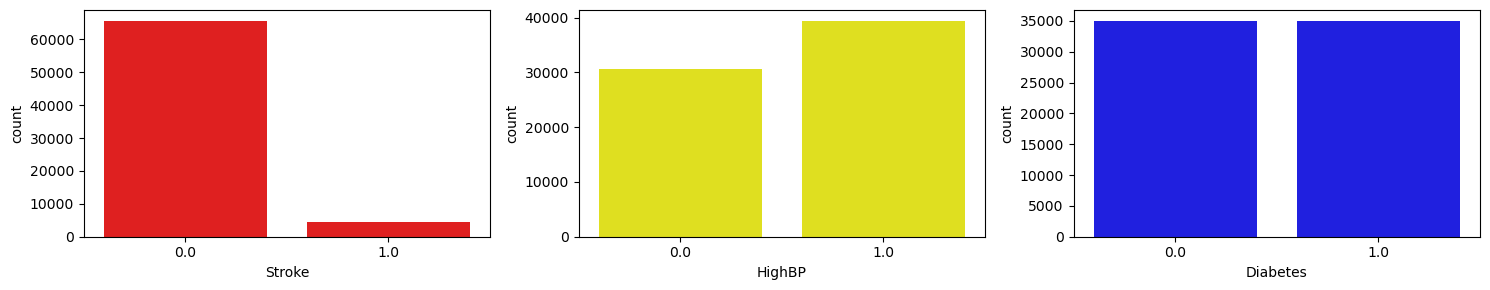

In [235]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3) )

sns.countplot(data=diabetes, x='Stroke', ax=ax[0], color = 'red' )
sns.countplot(data=diabetes, x='HighBP', ax=ax[1], color = 'yellow')
sns.countplot(data=diabetes, x='Diabetes', ax=ax[2], color = 'blue')

plt.tight_layout()
plt.show()


<Axes: xlabel='Age'>

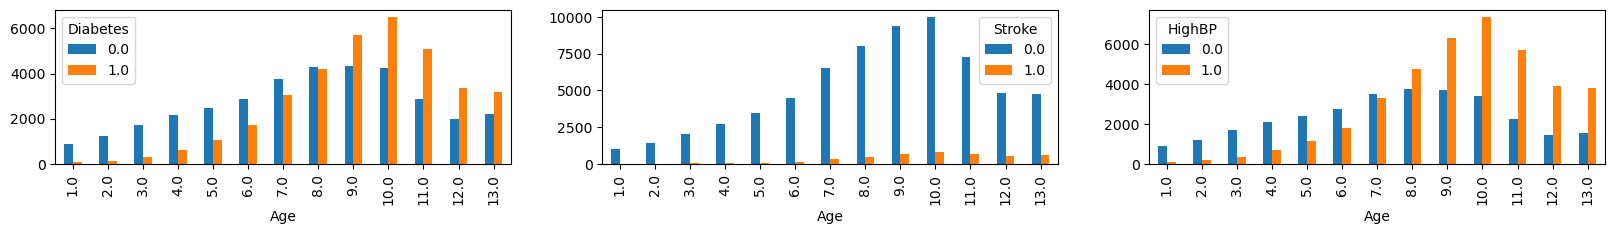

In [236]:
fig , ax = plt.subplots(1,3 ,figsize=(20,2) )
diabetes.groupby(['Age', 'Diabetes' ]).size().unstack().plot(kind='bar' ,ax = ax[0])
diabetes.groupby(['Age', 'Stroke' ]).size().unstack().plot(kind='bar' , ax= ax[1])
diabetes.groupby(['Age', 'HighBP' ]).size().unstack().plot(kind='bar' , ax= ax[2])

<Axes: title={'center': 'Alcohol Consump and Diabetes'}, xlabel='HvyAlcoholConsump'>

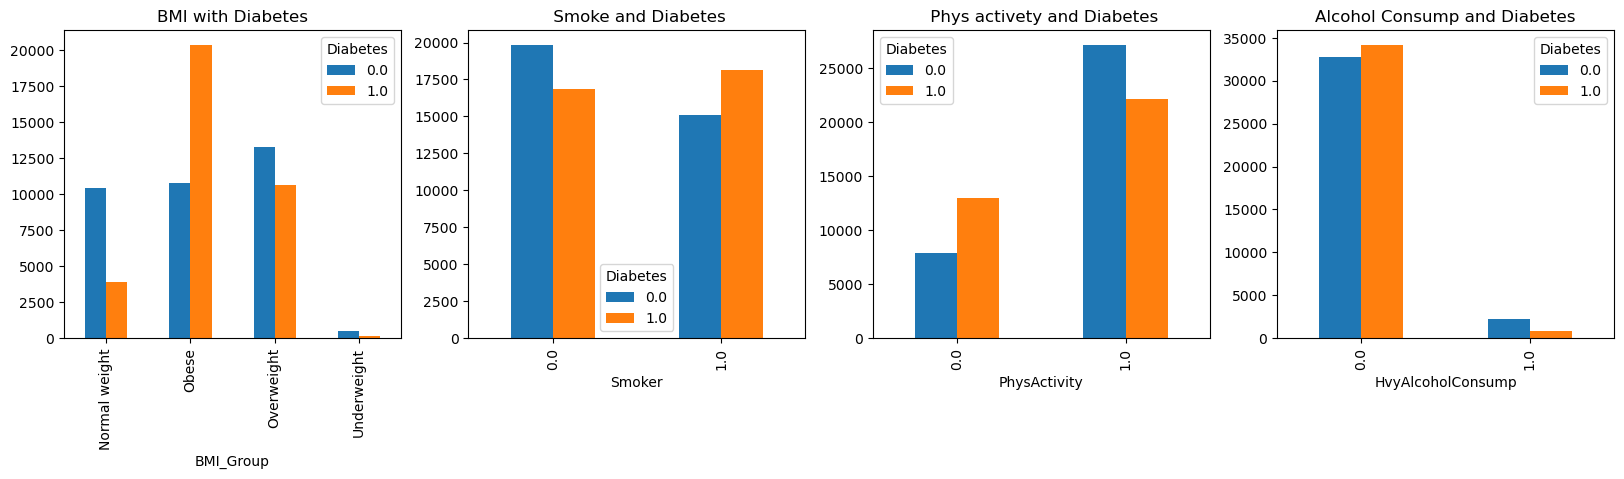

In [237]:


fig , ax = plt.subplots(1,4 , figsize=(20,4))

diabetes.groupby(['BMI_Group', 'Diabetes']).size().unstack().plot(kind='bar' ,ax=ax[0] , title='BMI with Diabetes')

diabetes.groupby(['Smoker', 'Diabetes']).size().unstack().plot(kind='bar',ax=ax[1],title= ' Smoke and Diabetes')

diabetes.groupby(['PhysActivity', 'Diabetes']).size().unstack().plot(kind='bar',ax=ax[2],title= ' Phys activety and Diabetes')

diabetes.groupby(['HvyAlcoholConsump', 'Diabetes']).size().unstack().plot(kind='bar',ax=ax[3],title='Alcohol Consump and Diabetes')

____
____
___
> ### Preparing to start using the models

In [238]:
diabetes = pd.get_dummies(diabetes , columns=['BMI_Group' ])


In [239]:
diabetes.head(3)

,Age,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,BMI_Group_Normal weight,BMI_Group_Obese,BMI_Group_Overweight,BMI_Group_Underweight
28472,10.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,False,False,True,False
7146,4.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
17400,10.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False


___


> ## <center> train_test_split the data </center>


In [257]:
hi_coo = ['Age' , 'HighChol' , 'BMI_Group_Normal weight' , 'BMI_Group_Obese' , 'BMI_Group_Overweight' , 'BMI_Group_Underweight', 'HeartDiseaseorAttack' , 'GenHlth' , 'PhysHlth' , 'DiffWalk' , 'HighBP']
X = diabetes.drop(columns= [i for i in diabetes if i not in hi_coo  ], axis=1)
y = diabetes['Diabetes']

X_train,X_test , y_train , y_test = train_test_split(X,y , test_size= 0.2 , random_state= 42 )



____
> ## <center> def for print the result </center>


In [258]:
from sklearn.metrics import f1_score, roc_auc_score

def acc_print(model,model_name, X_test, y_test , fit_time):
    # حساب التنبؤات
    y_pred = model.predict(X_test)
        
    y_proba = model.predict_proba(X_test)[:, 1]  

    # حساب الدرجات
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # إنشاء DataFrame مع فهرس
    frame = pd.DataFrame({'model': [str(model_name)], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [accuracy], 
                          'recall score': [recall],
                          'f1 score': [f1],
                          'roc_auc score': [roc_auc],
                          'fit time' : [fit_time]})
    
    return frame




___
> ## <center> def for : get best model , parameter defullt </center>


In [259]:
def make_model(model_name , X_tr , y_tr, X_te  , y_te ):
    
    scaler = StandardScaler()
    model_l = model_name

    model  = Pipeline([
    ('scaler', scaler),
    ('model', model_l)
    ])

    
    start = time.time()
    model.fit(X_tr , y_tr)
    stop = time.time()
    
    fit_time =  ( stop - start )
    
    if not X_te.empty and not y_te.empty :
        
        model_pred = model.predict(X_te)
        
        acc_result = acc_print(model = model,model_name=model_name , X_test = X_te , y_test = y_te , fit_time= fit_time)
        
        return acc_result 
    
      
    

____  
> ## <center> test best model , parameter defullt </center> 
- **bace line**

In [260]:
make_model(DummyClassifier() , X_train , y_train , X_test , y_test )

,model,mean_squared_error,accuracy score,recall score,f1 score,roc_auc score,fit time
0,DummyClassifier(),0.504286,0.495714,1.0,0.662846,0.5,0.120275


___
- **LogisticRegression**

In [261]:
make_model(LogisticRegression() , X_train , y_train , X_test , y_test )

,model,mean_squared_error,accuracy score,recall score,f1 score,roc_auc score,fit time
0,LogisticRegression(),0.259429,0.740571,0.761671,0.744297,0.814053,0.157411


___
- **SVC**

In [264]:
model =SVC() 

start = time.time()
model.fit(X_train , y_train)
stop = time.time()
fit_time = stop - start 

y_pred = model.predict(X_test)
        

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

frame = pd.DataFrame({'model': [str(model)], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [accuracy], 
                          'recall score': [recall],
                          'f1 score': [f1],
                          'fit time' : [fit_time]})
    
frame

,model,mean_squared_error,accuracy score,recall score,f1 score,fit time
0,SVC(),0.263,0.737,0.810951,0.753515,196.189116


___
- **decision tree**

In [266]:
make_model(DecisionTreeClassifier(), X_train , y_train , X_test , y_test )

,model,mean_squared_error,accuracy score,recall score,f1 score,roc_auc score,fit time
0,DecisionTreeClassifier(),0.2945,0.7055,0.693084,0.699993,0.747414,0.218321


___
- **KNN**

In [267]:
make_model(KNeighborsClassifier(),X_train , y_train , X_test , y_test)

,model,mean_squared_error,accuracy score,recall score,f1 score,roc_auc score,fit time
0,KNeighborsClassifier(),0.292929,0.707071,0.726081,0.710769,0.764191,0.413669


___
- **RandomForest**

In [268]:
from sklearn.ensemble import RandomForestClassifier
make_model(RandomForestClassifier() , X_train , y_train , X_test , y_test)

,model,mean_squared_error,accuracy score,recall score,f1 score,roc_auc score,fit time
0,RandomForestClassifier(),0.283786,0.716214,0.738329,0.720624,0.781478,4.974194


___
___
> ## <center> GridSearch & randomSearch </center>


- **logistic**

In [276]:
lgr = Pipeline([
    ('scaler', StandardScaler()),
    ('lgr', LogisticRegression())
])

In [277]:
lgr_params = {
    'lgr__C': [0.01, 0.1, 1, 10, 100, 1000],
    'lgr__penalty': ['l2' ],
    'lgr__solver': ['lbfgs', 'liblinear'],
    'lgr__max_iter': [100, 1000, 10000, 100000],
    'lgr__fit_intercept': [True, False]
}


In [278]:
#gridsearch 
lgr_grid =GridSearchCV(estimator = lgr,
                   param_grid= lgr_params , cv=5)


start = time.time()
lgr_grid.fit(X_train, y_train)
stop = time.time()

#stats
lgr_time = stop - start
lgr_params = lgr_grid.best_params_
lgr_acc = lgr_grid.score(X_test, y_test)
lgr_rec = recall_score(y_test, lgr_grid.predict(X_test))
lgr_f1 = f1_score(y_test, lgr_grid.predict(X_test))



In [282]:
mse = mean_squared_error(y_test , lgr_grid.predict(X_test))
print(lgr_params ,'\n')
frame = pd.DataFrame({'model': ['LogisticRegression'], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [lgr_acc], 
                          'recall score': [lgr_rec],
                          'f1 score': [lgr_f1],
                          'fit time' : [lgr_time]})
frame

{'lgr__C': 0.01, 'lgr__fit_intercept': False, 'lgr__max_iter': 100, 'lgr__penalty': 'l2', 'lgr__solver': 'lbfgs'} 



,model,mean_squared_error,accuracy score,recall score,f1 score,fit time
0,LogisticRegression,0.258571,0.741429,0.773199,0.74777,79.080356


The **GridSearch** showed slightly better results compared to the **RandomSearch** that depends on trying the parameters randomly, which may cause some of them to not be tried, but it has one advantage, which is speed compared to the normal search that tries all the features.  
`So it may cause problems in the following models so I will choose according to the situation which will cause relatively inaccurate results but it will not differ much`

___
- **SVC**

In [290]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())  
])


In [291]:
SVC_params = {'svc__kernel' : ['linear', 'rbf', 'sigmoid'] , 'svc__max_iter':[100000] , 'svc__class_weight': ['balanced']
    
}

In [ ]:
#gridsearch 
SVC_grid =GridSearchCV(estimator = svc_pipeline,
                   param_grid= SVC_params , cv=5)


start = time.time()
SVC_grid.fit(X_train, y_train)
stop = time.time()

#stats
SVC_time = stop - start
SVC_params = SVC_grid.best_params_
SVC_acc = lgr_grid.score(X_test, y_test)
SVC_rec = recall_score(y_test, SVC_grid.predict(X_test))
SVC_f1 = f1_score(y_test, SVC_grid.predict(X_test))


In [294]:
mse = mean_squared_error(y_test , SVC_grid.predict(X_test))
print(SVC_params ,'\n')
frame = pd.DataFrame({'model': ['SVC'], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [SVC_acc], 
                          'recall score': [SVC_rec],
                          'f1 score': [SVC_f1],
                          'fit time' : [SVC_time]})
frame

{'svc__class_weight': 'balanced', 'svc__kernel': 'linear', 'svc__max_iter': 100000} 



,model,mean_squared_error,accuracy score,recall score,f1 score,fit time
0,SVC,0.259857,0.741429,0.783141,0.749242,3767.40404


____
- ### tree

In [299]:
#decision tree 
tree = Pipeline([
    ('scaler', StandardScaler() ),
    ('tree', DecisionTreeClassifier())
])

In [300]:
tree_params = {
    'tree__criterion': ['gini', 'entropy', 'log_loss'],  
    'tree__max_depth': [None, 10, 20, 30],
    'tree__min_samples_split': [2 ,4 ,6],  
    'tree__min_samples_leaf': [1, 2, 4]
}

In [301]:
#gridsearch
tree_grid = GridSearchCV(estimator = tree,param_grid = tree_params  , n_jobs= -1  )
                   

start = time.time()
tree_grid.fit(X_train, y_train)
stop = time.time()

#stats
tree_time = stop - start
tree_params = tree_grid.best_params_
tree_acc = tree_grid.score(X_test, y_test)
tree_rec = recall_score(y_test, tree_grid.predict(X_test))
tree_f1 = f1_score(y_test, tree_grid.predict(X_test))

In [303]:
mse = mean_squared_error(y_test , tree_grid.predict(X_test))
print(tree_params ,'\n')
frame = pd.DataFrame({'model': ['tree'], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [tree_acc], 
                          'recall score': [tree_rec],
                          'f1 score': [tree_f1],
                          'fit time' : [tree_time]})
frame

{'tree__criterion': 'log_loss', 'tree__max_depth': 10, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2} 



,model,mean_squared_error,accuracy score,recall score,f1 score,fit time
0,tree,0.262714,0.737286,0.78098,0.746659,58.6991


The improvement in accuracy was not very noticeable while the recall score seemed to make a noticeable difference.  
`*randomsearch - result*`
|'tree__max_depth': 10|'tree__min_samples_leaf': 2|'tree__min_samples_split': 6| 0.7333333333333333|0.7494140808099747|0.7405966277561609| 0.26666666666666666|  
|---------------------|---------------------------|----------------------------|-------------------|------------------|------------------|--------------------|    

  
But the difference is clear between the model without and with Gridsearch.

___
- ### KNeighborsClassifier

In [311]:
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11 , 21 , 41 , 51,101,1001],  
    'knn__weights': ['uniform', 'distance'],  # نوع الوزن
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
}


In [312]:
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [313]:
knn_grid = RandomizedSearchCV(estimator=model, param_distributions =knn_params , n_iter= 10, cv=3, n_jobs=-1)

start = time.time()
knn_grid.fit(X_train, y_train)
stop = time.time()

knn_time = stop - start


In [315]:
y_pred = knn_grid.best_estimator_.predict(X_test)
y_proba = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


In [316]:
print(knn_grid.best_params_,'\n')
frame = pd.DataFrame({'model': ['KNN'], 
                          'mean_squared_error': [mse], 
                          'accuracy score': [knn_acc], 
                          'recall score': [knn_rec],
                          'f1 score': [knn_f1],
                          'fit time' : [knn_time]})
frame

{'knn__weights': 'uniform', 'knn__n_neighbors': 41, 'knn__metric': 'euclidean', 'knn__algorithm': 'auto'} 



,model,mean_squared_error,accuracy score,recall score,f1 score,fit time
0,KNN,0.262071,0.737929,0.788184,0.748853,163.088584


___
- **RandomForest**

In [317]:
from sklearn.metrics import accuracy_score, classification_report

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [321]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(random_state=42))  #  Random Forest
])

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

start = time.time()

grid_search.fit(X_train, y_train)

end = time.time()

print(f"Time taken for GridSearchCV: {end - start:.2f} seconds")

print("Best parameters found:", grid_search.best_params_)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Time taken for GridSearchCV: 182.00 seconds
Best parameters found: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}


In [322]:
y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))


Accuracy: 74.14%
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7060
         1.0       0.72      0.78      0.75      6940

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



_____
____
____
> ## <center> random forest 2 output </center>

In [326]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

data = diabetes

X = data.drop(columns=['Diabetes', 'Stroke'])
y_diabetes = data['Diabetes']
y_stroke = data['Stroke']

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(X, y_stroke, test_size=0.2, random_state=42)


In [327]:
param_distributions = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

#   (Pipeline)   StandardScaler   RandomForestClassifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest
])

random_search_diabetes = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_distributions, 
                                            n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search_stroke = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_distributions, 
                                          n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)

start = time.time()

# RandomizedSearchCV 
random_search_diabetes.fit(X_train_diabetes, y_train_diabetes)

#RandomizedSearchCV 
random_search_stroke.fit(X_train_stroke, y_train_stroke)

end = time.time()

print(f"Time taken for RandomizedSearchCV: {end - start:.2f} seconds")

print("Best parameters for diabetes model:", random_search_diabetes.best_params_)
print("Best parameters for stroke model:", random_search_stroke.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Time taken for RandomizedSearchCV: 194.99 seconds
Best parameters for diabetes model: {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 10}
Best parameters for stroke model: {'rf__n_estimators': 50, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 10}


In [328]:
y_pred_diabetes = random_search_diabetes.best_estimator_.predict(X_test_diabetes)

y_pred_stroke = random_search_stroke.best_estimator_.predict(X_test_stroke)

accuracy_diabetes = accuracy_score(y_test_diabetes, y_pred_diabetes)
f1_diabetes = f1_score(y_test_diabetes, y_pred_diabetes)
recall_diabetes = recall_score(y_test_diabetes, y_pred_diabetes)

accuracy_stroke = accuracy_score(y_test_stroke, y_pred_stroke)
f1_stroke = f1_score(y_test_stroke, y_pred_stroke)
recall_stroke = recall_score(y_test_stroke, y_pred_stroke)

print("\nDiabetes Model Performance:")
print(f"Accuracy: {accuracy_diabetes * 100:.2f}%")
print(f"F1 Score: {f1_diabetes:.2f}")
print(f"Recall: {recall_diabetes:.2f}")

print("\nStroke Model Performance:")
print(f"Accuracy: {accuracy_stroke * 100:.2f}%")
print(f"F1 Score: {f1_stroke:.2f}")
print(f"Recall: {recall_stroke:.2f}")

print("\nClassification Report for Diabetes Model:")
print(classification_report(y_test_diabetes, y_pred_diabetes))

print("\nClassification Report for Stroke Model:")
print(classification_report(y_test_stroke, y_pred_stroke))



Diabetes Model Performance:
Accuracy: 74.49%
F1 Score: 0.75
Recall: 0.78

Stroke Model Performance:
Accuracy: 93.85%
F1 Score: 0.00
Recall: 0.00

Classification Report for Diabetes Model:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7060
         1.0       0.72      0.78      0.75      6940

    accuracy                           0.74     14000
   macro avg       0.75      0.75      0.74     14000
weighted avg       0.75      0.74      0.74     14000


Classification Report for Stroke Model:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     13138
         1.0       1.00      0.00      0.00       862

    accuracy                           0.94     14000
   macro avg       0.97      0.50      0.49     14000
weighted avg       0.94      0.94      0.91     14000



___
____
_____

> ## Below is an analysis of the results of the Random Forest models used to classify diabetes and stroke. I will present the main points clearly and briefly:

1. Diabetes Model Performance:

Metric Value
Accuracy 74.49%
F1 Score 0.75
Recall 0.78
Pros:

Reasonable accuracy of the model (74.49%), indicating that the model is able to classify diabetes well in most cases.
F1 Score of 0.75 shows a good balance between precision and recall.
Recall ratio of 0.78 indicates that the model is able to detect positive cases (patients with diabetes) effectively.
Cons:

Although the performance is good, the accuracy could be improved further to avoid classifying some positive cases as non-diabetic.
2. Stroke Model Performance:
Metric Value
Accuracy 93.85%
F1 Score 0.00
Recall 0.00
Pros:

The apparent accuracy of the model is very high (93.85%).
Cons:

Although the accuracy is high, the F1 Score and Recall at 0.00 show that the model fails to classify stroke cases. This suggests that the model suffers from an inability to distinguish between positive (stroke) cases and negative cases, possibly due to imbalance in the data or the model’s inability to learn from the available data.
3. Random Forest for Diabetes (Single Output):
Metric Value
Accuracy 74.14%
F1 Score 0.74
Recall 0.74
Pros:

The results here are almost similar to what we got in the multi-output model, with acceptable accuracy.
The balance between Precision and Recall is good.
Cons:

There is room for improvement in the model’s performance, as the accuracy is still average.
4. Default Random Forest Model (No Tuning):

Metric Value
Mean Squared Error 0.283
Accuracy 71.62%
Recall 0.738
F1 Score 0.720
ROC AUC 0.781
Fit Time 4.97s
Pros:

The model in its default mode performs relatively well, with an accuracy of 71.62% and a high Recall.

Fit Time is very short compared to other models, which improves training speed.

Cons:

Performance is lower compared to models optimized using RandomizedSearchCV.

Accuracy and F1 Score can be improved by tweaking the parameters.

Comprehensive Analysis:
The diabetes model performs reasonably well, whether in default mode or after optimizing the parameters. It can be used reliably for diabetes diagnosis with some additional optimizations.
The stroke model has a significant problem with classifying positive cases, suggesting that the data should be re-evaluated (perhaps rebalancing the data or using other techniques to avoid model bias).

RandomizedSearchCV provides a slight improvement, but the model still needs further tweaking to improve performance.

Recommendations:

I did not have time to improve the data distribution and consistency especially for the stroke model, because the results suggest a problem with the balance between positive and negative cases.

I tried another model like XGBoost with parameter optimization but it did not give better results than any of them

____
Analysis of the developed models
### 1. **Logistic Regression**
- **Mean Squared Error:** 0.2586
- **Accuracy Score:** 74.14%
- **Recall Score:** 77.32%
- **F1 Score:** 74.77
- **Fit Time:** 79.08s

**Analysis:**
- **Accuracy:** is relatively good, but lower than some other models.
- **Recall:** is high, meaning the model catches most of the positive cases.
- **F1 Score:** is balanced, reflecting a good balance between accuracy and recall.
- **Training Time:** is lower than most other models, making it faster to train.

### 2. **Support Vector Classifier (SVC)**
- **Mean Squared Error:** 0.2599
- **Accuracy Score:** 74.14%
- **Recall Score:** 78.31%
- **F1 Score:** 74.92
- **Fit Time:** 3767.40s

**Analysis:**
- **Precision:** Same as Logistic Regression, but takes longer to train.
- **Recall:** Slightly better than Logistic, meaning it catches a higher percentage of positive cases.
- **F1 Score:** Higher than Logistic, indicating a good balance between precision and recall.
- **Training Time:** Very long, making it less time-efficient.

### 3. **Decision Tree**
- **Mean Squared Error:** 0.2627
- **Accuracy Score:** 73.73%
- **Recall Score:** 78.10%
- **F1 Score:** 74.67
- **Fit Time:** 58.70s

**Analysis:**
- **Accuracy:** Lower than other models.
- **Recall:** Similar to other models, but slightly higher.
- **F1 Score:** Similar to Logistic Regression and SVC, indicating a good balance between accuracy and recall.
- **Training Time:** Lower than SVC, but longer than Logistic Regression.

### 4. **K-Nearest Neighbors (KNN)**
- **Mean Squared Error:** 0.2621
- **Accuracy Score:** 73.79%
- **Recall Score:** 78.82%
- **F1 Score:** 74.89
- **Fit Time:** 163.09s

**Analysis:**
- **Accuracy:** Similar to Tree, but slightly higher.
- **Recall:** Higher than other models, meaning it captures more positive cases.
- **F1 Score:** Similar to Decision Tree and Logistic Regression.
- **Training Time:** Less than SVC but longer than Logistic Regression.

Finally
- **SVC** offers the highest recall but with a very long training time.
- **Logistic Regression** is the most time efficient with good performance in accuracy and F1 Score.
- **Decision Tree** and **KNN** give similar results, but **KNN** gives higher recall.

``I don't know why I chose the model, it seems that my choice of data in the first place was beyond my capabilities
Please note that I sometimes use the translator to take care of linguistic accuracy``

____
____
____

<center>
    <h3 style="background-color:silver; ">Thanks for your time</h3>
</center>
